# Regression Homework

This is the first assignment for CAP 4630 and we will develop two basic models with regression. \
You will use **"Tasks"** and **"Hints"** to finish the work. **(Total 100 Points)**


**Task Overview:**
- Singal Variable Nonlinear Regression
- Multiple Variable Linear Regression


## 1 - Packages ##

Import useful packages for scientific computing and data processing. **(5 Points)**

**Tasks:**
1. Import numpy and rename it to np.
2. Import pandas and rename it to pd.
3. Import the pyplot function in the libraray of matplotlib and rename it to plt.

References:
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.

**Attention:**
1. After this renaming, you will use the new name to call functions. For example, **numpy** will become **np** in the following sections.


In [1]:
#PID 5062063
#Name Zachary Hull
# Coding here
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## 2 - Data Preparation ##

Prepare the data for regression task. **(10 Points)**

**Tasks:**
1. Load data for nonlinear regression.
2. Generate the scatter plot of the data.

**Hints:**
1. The data file is "data_nonlinear.csv".
2. The data format is as follows: 1st column is X and 2nd column is Y.

In [2]:
# Coding here
from google.colab import drive
drive.mount('/content/drive')

# TODO
from google.colab import drive

csv_name = '/content/drive/MyDrive/data_nonlinear.csv'
with open(csv_name, 'r') as file:
  df = pd.read_csv(csv_name)

print(df)
print(df.shape)

Mounted at /content/drive
           X            Y
0  -0.812377   146.013887
1  -6.935876 -2050.854715
2   3.486073   561.936114
3   0.563652    54.220542
4   5.511145  2207.389506
..       ...          ...
95 -5.758898  -468.241012
96 -0.927995   368.884052
97 -5.536775  -978.079550
98 -2.210791  1390.267279
99  5.051275  2853.676231

[100 rows x 2 columns]
(100, 2)


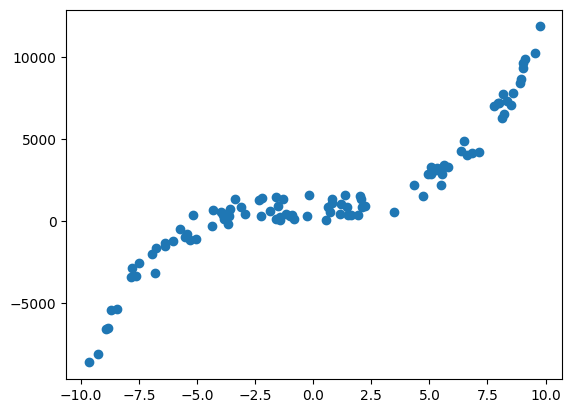

In [3]:
x = df['X']
y = df['Y']
plt.scatter(x, y)
plt.show()

## 3 - Single Variable Nonlinear Regression ##


Develop a regression model, estimate coefficients with data, and derive the relationship. **(30 Points)**

**Tasks:**
1. Establish a relationship between Y and X with a cubic function.
2. Compute MSE loss with observation-prediction pairs.
3. Implement **Gradient Descent (GD)** to achieve optimal solution with the learning rate of **0.000001 (1e-6)** and **10000 (1e4)** epochs.
4. Print out the optimal solution at final step.

**Hints:**  
1. Given the example of linear regression in class, modify the function to an equation for a spline with coefficients of **a** , **b**, **c** and **d** for cubic, qudractic, linear, and constant term.
2. Initialize the model with zero. For example, a=0, b=0, c=0 and d=0.
3. It may take **10-15 seconds**  to finish the running for 10000 steps. Be patient.
4. For debugging, the results of **a**, **b**, **c**, **d** for first five steps are as follows:

Epoch  0 :  2.8045093168662314 0.15006631239563697 0.04047903434004733 0.0030023401200892003 \
Epoch  1 :  4.905935374329749 0.2803623842843468 0.07068280026181122 0.0057565282228493 \
Epoch  2 :  6.480417434500056 0.395779237410925 0.09318576969022647 0.008323648642107889 \
Epoch  3 :  7.65996806232127 0.49998280146312246 0.10991745268097952 0.010749486523089888 \
Epoch  4 :  8.543527816733905 0.5957208253596222 0.12232397430880633 0.013068360586717544



In [4]:
# Coding here
cube = np.polyfit(x, y, 3)
model = np.poly1d(cube)
lr = 0.000001
epoch = 10000
a = 0
b = 0
c = 0
d = 0

for i in range (epoch):
  y_pred = a * x**3 + b * x**2 + c * x + d
  mse = np.mean((y - y_pred)**2)

  calc_a = 2 * np.mean((y_pred - y) * x**3)
  calc_b = 2 * np.mean((y_pred - y) * x**2)
  calc_c = 2 * np.mean((y_pred - y) * x)
  calc_d = 2 * np.mean((y_pred - y))

  a -= calc_a * lr
  b -= calc_b * lr
  c -= calc_c * lr
  d -= calc_d * lr

print(f"Optimal solution: a: {a} b: {b} c: {c} d: {d}")
print(f"Loss: {mse}")
print(f"y = {a} x^3 + {b} x^2 {c}x + {d}")

Optimal solution: a: 10.655168698725843 b: 20.970276527941813 c: -1.8103041714197277 d: 7.989333607627859
Loss: 587236.1426240157
y = 10.655168698725843 x^3 + 20.970276527941813 x^2 -1.8103041714197277x + 7.989333607627859


## 4 - Prediction Results ##

Derive prediction function and generate estmated results. **(5 Points)**

**Tasks:**
1. Derive prediction function with the obtained coefficients above.
2. Generate scatter plots for original data pairs X-Y and prediction results X-Y_Pred in the same figure.

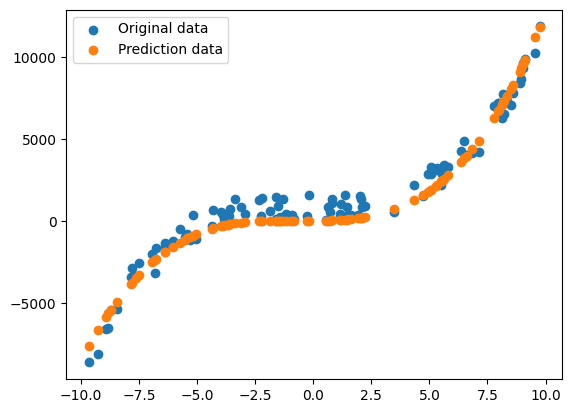

In [5]:
# Coding here
y_pred = a * x**3 + b * x**2 + c * x + d
plt.scatter(x, y, label="Original data")
plt.scatter(x, y_pred, label="Prediction data")
plt.legend()
plt.show()

## 5 - Multiple Variables Linear Regression ##

## 5.1 Data Preparation

Prepare the data for regression task. **(10 Points)**

**Tasks:**
1. Load data for multiple variable linear regression.
2. Generate the 3D scatter plot of the data.

**Hints:**
1. The data file is "data_two_variables.csv".
2. The data format is as follows: 1st column is X1, 2nd column is X2, and 3rd colum is Y.
3. You may use "mplot3d" in the toolkit of "mpl_toolkits" and import "Axes3D" to faciliate 3D scatter plot. More details can be found in the reference of https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
4. [Optional, NO Credit]You may rotate the figure you generated by using "%matplotlib qt" before you plot it. Remember to install the related package by "!pip install PyQt5". Only work on Jupyter(locally). Does not work on Google Colab. [Reference Website](https://stackoverflow.com/questions/14261903/how-can-i-open-the-interactive-matplotlib-window-in-ipython-notebook)

![](https://drive.google.com/uc?export=view&id=1sHwWfZXpU3-8SqzFrmCxIvxmQWfe2Nns)
![](https://drive.google.com/uc?export=view&id=1OwHP0g-K2um-LnKiDhE6UfkDFxk4Opce)


          X1         X2           Y
0   9.624635   8.521227  760.342549
1   7.246414   1.453848  334.062641
2   7.682933  10.874100  783.724738
3   2.363142   4.544764  401.073157
4   5.788609  13.591267  901.487267
..       ...        ...         ...
95  3.509973  14.437170  600.682865
96  2.916080   2.819321  257.565599
97  0.089975  12.785568  691.834017
98  5.208469   7.765647  726.299832
99  4.428768   2.871729  316.814913

[100 rows x 3 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

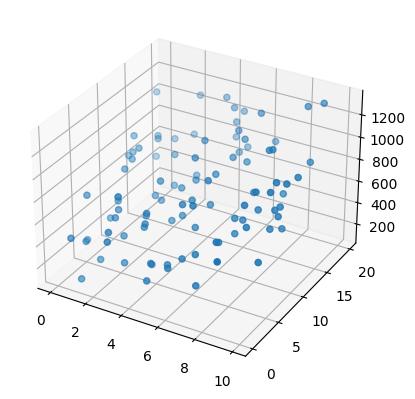

In [6]:
# Coding here
from mpl_toolkits.mplot3d import Axes3D
csv2 = '/content/drive/MyDrive/data_two_variables.csv'
with open(csv2, 'r') as file:
  df2 = pd.read_csv(csv2)

print(df2)
X1 = df2['X1']
X2 = df2['X2']
Y = df2['Y']

ax = plt.axes(projection = "3d")

ax.scatter3D(X1, X2, Y)
plt.show


## 5.2 Linear Regression

Develop a regression model, estimate coefficients with data, and derive the relationship. **(30 Points)**

**Tasks:**
1. Establish a linear function to describe the relationship among Y, X1, and X2.
2. Compute MSE loss with observation-prediction pairs.
3. Implement **Gradient Descent (GD)** to achieve optimal solution with the learning rate of **0.001 (1e-3)** and **10000 (1e4)** epochs.
4. Print out the optimal solution at final step.


**Hints:**  
1. Given the example of linear regression in class, modify the function to a linear equation with two independent variables X1 and X2. The coefficients of X1 and X2 are **m1** and **m2**, respectively. The constant term is **m3**.
2. Initialize the model with zero. For example, m1=0, m2=0, and m3=0.
3. It may take **10-15 seconds**  to finish the running for 10000 steps. Be patient.
4. For debugging, the results of **m1**, **m2**, and **m3** for first five steps are as follows:

Epoch 0: 7.43847600018326 15.595631430047339 1.4265844915879997 \
Epoch 1: 12.954483113402425 26.731746959534096 2.481143659135288 \
Epoch 2: 17.084193849045587 34.664109745712814 3.2680146970514863 \
Epoch 3: 20.213137348549306 40.2953527521597 3.8622050343066556 \
Epoch 4: 22.618552798604984 44.274269323103674 4.317638791453634 \
Epoch 5: 32.734943422646175 34.69592128962032 222.91661391579638

In [9]:
# Coding here
lr2 = 0.001
epoch2 = 10000
m1 = 0
m2 = 0
m3 = 0

for j in range(epoch2):
  Y_pred = m1*X1 + m2*X2 + m3
  mse = np.mean((Y - Y_pred)**2)

  calc_m1 = 2 * np.mean((Y_pred - Y) * X1)
  calc_m2 = 2 * np.mean((Y_pred - Y) * X2)
  calc_m3 = 2 * np.mean((Y_pred - Y))

  m1 -= lr2 * calc_m1
  m2 -= lr2 * calc_m2
  m3 -= lr2 * calc_m3

print(f"Optimal Solution: {m1} {m2} {m3}")
print(f"Loss: {mse}")


Optimal Solution: 32.73494342264618 34.69592128962032 222.91661391579635
Loss: 20269.83574374662



## 5.3 - Prediction Results ##

Derive prediction function and generate estmated results. **(10 Points)**

**Tasks:**
1. Derive prediction function with the obtained coefficients above.
2. Generate 3D scatter plots for original data pairs X-Y and prediction results X-Y_Pred in the same figure.

**Hint:**
1. You may follow the example above.
2. An example is shown below.
![](https://drive.google.com/uc?export=view&id=1xAl7eJmDmFPTNipd0SljAdyHs3PhRiMg)
![](https://drive.google.com/uc?export=view&id=1Eb9qZqTCmAbwJUkoTQ6zPys3ezWqTCkr)

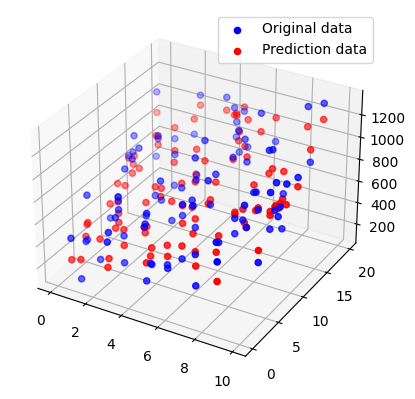

In [10]:
# Coding here
Y_pred = m1*X1 + m2*X2 + m3
ax = plt.axes(projection = "3d")

ax.scatter3D(X1, X2, Y, color="Blue", label="Original data")
ax.scatter3D(X1, X2, Y_pred, color="Red", label="Prediction data")
plt.legend()
plt.show()